-04-Basics-of-image-processing  © by A.Richter (2018)
------------------------------------------

In this notebook I will have a closer look at two modules that can be used for basic image analysis tasks.

The first module is called **scikit-image** and the second is **openCV (cv2)**

**Overview of the notebook:**
    - Import with Skimage
    - Import with OpenCV
    - Reading from a folder
    - 8-bit vs. 16-bit data
    - Color Composite
    - Correlations between Channelels
    - Filtering images

Intro 
--

In [2]:
import skimage
import skimage.io as skio
from skimage import exposure
from scipy.misc import bytescale

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import glob

%matplotlib inline

In [1]:
import h5py

In [13]:
f = h5py.File("data/mytestfile.hdf5", "w")

In [17]:
with h5py.File("data/mytestfile.hdf5", "w") as f:
    dset = f.create_dataset("mydataset", (100,), dtype='i')
    grp = f.create_group("subgroup")
    


In [19]:
print(dset.name)

None


Import of Images with **Scikit-Image**
--

The following images are multi-channel IKONOS with a resolution of 4m multi and 1m pan

Images in python are handled in form of matrix structures

the data in the files is 16bit integer

(1764, 1874) uint16 2047
[[526 559 546 504 488 492 488 488 490 490]
 [529 557 563 515 483 486 487 496 504 497]
 [530 556 569 526 470 457 467 483 490 482]
 [505 559 587 561 504 471 460 475 491 496]
 [455 538 586 572 517 477 482 490 502 509]
 [462 542 574 583 469 416 511 536 516 514]
 [468 521 545 572 517 406 450 509 498 497]
 [443 454 481 518 563 419 413 512 491 489]
 [354 423 398 379 531 522 467 490 486 489]
 [488 500 482 422 473 563 528 469 466 482]]


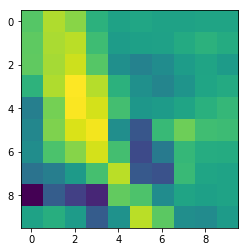

In [3]:
Folder='../FE-ImageData/'
IKOPan=skio.imread(Folder+'po_221141_pan_sub.TIF')
IKORed=skio.imread(Folder+'po_221141_red_sub.TIF')
IKOGreen=skio.imread(Folder+'po_221141_green_sub.TIF')
IKOBlue=skio.imread(Folder+'po_221141_blue_sub.TIF')
IKONir=skio.imread(Folder+'po_221141_nir_sub.TIF')
print(IKORed.shape, IKORed.dtype, np.max(IKORed))

print(IKORed[100:110,100:110])
plt.imshow(IKORed[100:110,100:110])

Import the Images with **OpenCV (CV2)**
--

In [4]:
Folder='../FE-ImageData/'
#IKOPan=skio.imread(Folder+'IKONOS2_dodola_Pan_Kanal/_Tif/po_221141_pan_sub.TIF')
IKORedcv2=cv2.imread(Folder+'po_221141_red_sub.TIF',-1)
print(IKORedcv2.shape, IKORedcv2.dtype, np.max(IKORedcv2))
print(25*'-')
print(IKORedcv2[100:110,100:110])

(1764, 1874) uint16 2047
-------------------------
[[526 559 546 504 488 492 488 488 490 490]
 [529 557 563 515 483 486 487 496 504 497]
 [530 556 569 526 470 457 467 483 490 482]
 [505 559 587 561 504 471 460 475 491 496]
 [455 538 586 572 517 477 482 490 502 509]
 [462 542 574 583 469 416 511 536 516 514]
 [468 521 545 572 517 406 450 509 498 497]
 [443 454 481 518 563 419 413 512 491 489]
 [354 423 398 379 531 522 467 490 486 489]
 [488 500 482 422 473 563 528 469 466 482]]


the parameter **cv2.imread(...,-1)** is needed to import the data unchanged. Try to import the image without the -1 parameter and you will have an 8bit instead of a 16bit array

In [5]:
IKORedcv2=cv2.imread(Folder+'po_221141_red_sub.TIF')
print(IKORedcv2.shape, IKORedcv2.dtype, np.max(IKORedcv2))
print(25*'-')
print(IKORedcv2[100:110,100:110,1])


(1764, 1874, 3) uint8 7
-------------------------
[[2 2 2 1 1 1 1 1 1 1]
 [2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 1 1 1 1 1 1]
 [1 2 2 2 1 1 1 1 1 1]
 [1 2 2 2 2 1 1 1 1 1]
 [1 2 2 2 1 1 1 2 2 2]
 [1 2 2 2 2 1 1 1 1 1]
 [1 1 1 2 2 1 1 2 1 1]
 [1 1 1 1 2 2 1 1 1 1]
 [1 1 1 1 1 2 2 1 1 1]]


Read images from a folder and plot images
---

../FE-ImageData/po_221141_blue_sub.tif


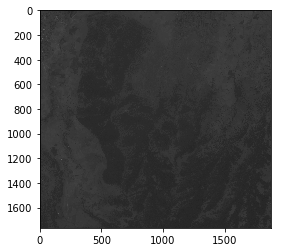

../FE-ImageData/po_221141_green_sub.tif


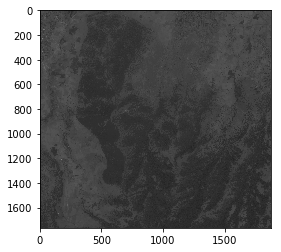

../FE-ImageData/po_221141_nir_sub.tif


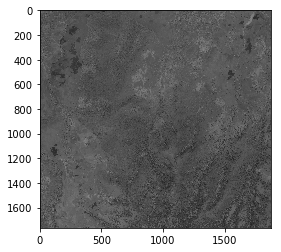

../FE-ImageData/po_221141_pan_sub.tif


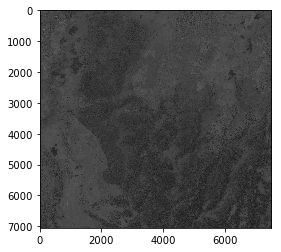

../FE-ImageData/po_221141_red_sub.tif


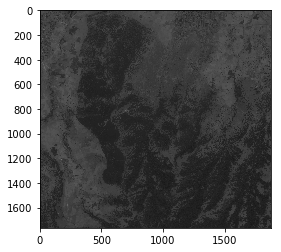

In [6]:
Folder='../FE-ImageData/'             # define Folder

TIFs=glob.glob(Folder+"*.tif")                    # generate list of the files with the Ending .tif
#TFWs=glob.glob(Folder+"*.tfw")
#OVRs=glob.glob(Folder+"*.ovr")

for filename in TIFs:                             # For loop to print the list of images
        print(filename)
        Bild=skio.imread(filename)
        plt.imshow(Bild, cmap = 'gray')
        plt.show()

In [7]:
print(IKOPan[1000:1010,1000:1010])
print( '-----')

print( 'max Value: {}'.format(np.max(IKOPan)))

[[554 560 563 576 595 573 583 574 567 547]
 [560 567 569 583 575 561 558 562 563 561]
 [554 548 587 583 588 558 574 558 548 521]
 [564 579 570 574 570 582 575 557 560 527]
 [585 561 564 594 594 581 537 559 555 526]
 [584 573 567 585 594 549 584 532 517 538]
 [575 556 580 587 557 589 556 524 517 561]
 [568 570 585 571 568 548 532 520 537 579]
 [579 589 586 558 556 527 512 510 601 600]
 [584 592 568 562 552 487 501 563 615 595]]
-----
max Value: 2047


8-bit Data vs. 16-Bit Data
---

In [11]:

#IKOPan8bit=skimage.img_as_ubyte(np.float32(IKOPan))
#IKORed8bit=skimage.img_as_ubyte(np.float32(IKORed))
#IKOGreen8bit=skimage.img_as_ubyte(IKOGreen)
#IKOBlue8bit=skimage.img_as_ubyte(IKOBlue)


IKOPan8bit=bytescale(IKOPan)
print( IKOPan8bit.shape, IKOPan8bit.dtype)
print( IKOPan8bit[1000:1010,1000:1010])
print( '-----')
print( 'max Value: {}'.format(np.max(IKOPan8bit)))

print( IKORed.shape, IKORed.dtype)
print( 5*'-----')
print(IKORed[1000:1010,1000:1010])
print( 5*'-----')
print( 'max Value: {}'.format(np.max(IKORed)))


img_8bit = cv2.imread(Folder+'po_221141_red_sub.TIF',-1).astype(np.uint8)
print(img_8bit[1000:1010,1000:1010])
print( 5*'-----')
print( 'max Value: {}'.format(np.max(img_8bit)))


(7051, 7494) uint8
[[69 70 70 72 74 71 73 72 71 68]
 [70 71 71 73 72 70 70 70 70 70]
 [69 68 73 73 73 70 72 70 68 65]
 [70 72 71 72 71 73 72 69 70 66]
 [73 70 70 74 74 72 67 70 69 66]
 [73 71 71 73 74 68 73 66 64 67]
 [72 69 72 73 69 73 69 65 64 70]
 [71 71 73 71 71 68 66 65 67 72]
 [72 73 73 70 69 66 64 64 75 75]
 [73 74 71 70 69 61 62 70 77 74]]
-----
max Value: 255
(1764, 1874) uint16
-------------------------
[[348 317 289 304 411 369 305 285 298 412]
 [352 310 309 304 332 286 286 301 277 274]
 [303 292 294 299 319 318 304 306 282 286]
 [342 349 299 321 334 362 372 300 305 302]
 [357 376 383 329 333 383 394 287 325 318]
 [337 310 372 347 316 333 348 383 324 320]
 [304 288 296 308 324 334 316 320 302 339]
 [300 296 304 296 306 305 292 283 317 384]
 [311 302 302 310 299 309 315 340 305 340]
 [304 292 293 309 301 300 292 312 306 288]]
-------------------------
max Value: 2047
[[ 92  61  33  48 155 113  49  29  42 156]
 [ 96  54  53  48  76  30  30  45  21  18]
 [ 47  36  38  43  63  6

Output of Histogramms of the PAN or Red Channel
---

16 bit - Histogramm


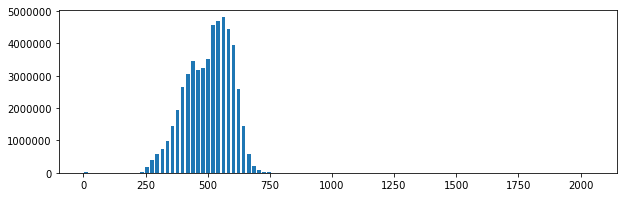

----------------
8 bit - Histogramm


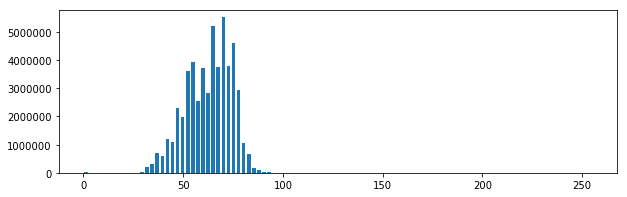

In [12]:
print('16 bit - Histogramm')

fig=plt.figure(figsize=(10,3))
#hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern
hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print( '----------------')
print('8 bit - Histogramm')


fig=plt.figure(figsize=(10,3))
#hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern
hist, bins = np.histogram(IKOPan8bit, bins=100)         #Anzahl der Intervalle, "bins" verändern

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Function to build an RBG TrueColor Image from scratch
---

http://gis.stackexchange.com/questions/120951/merging-multiple-16-bit-image-bands-to-create-a-true-color-tiff'


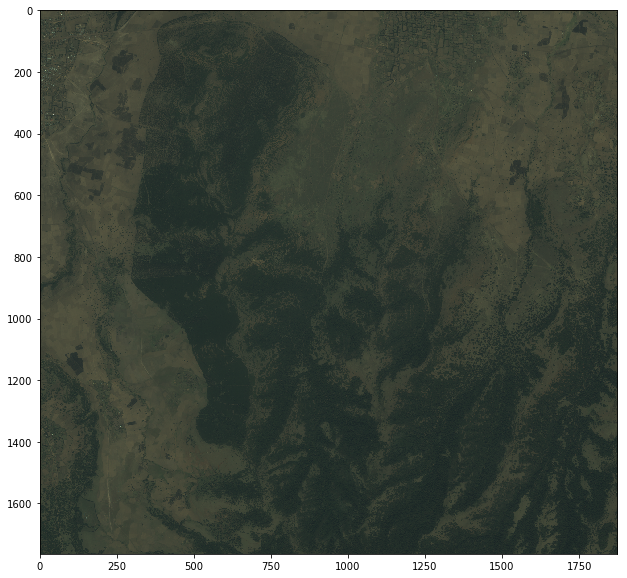

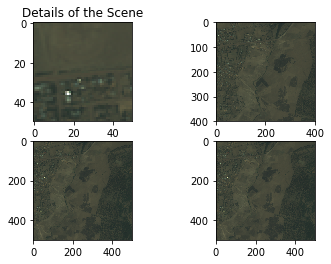

In [13]:
def create_composite(red_band, green_band, blue_band):

    img=np.dstack((red_band,green_band,blue_band))
    
    #p2, p98 = np.percentile(img, (2, 98)) 
    #img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    img_rescale = exposure.rescale_intensity(img, in_range='uint16')

    return bytescale(img_rescale)   # Konverting to 8bit for output in jupyter
    #return img_rescale


image = create_composite(IKORed, IKOGreen, IKOBlue)
plt.figure(figsize=(20,10))  
plt.imshow(image)
plt.show()

# see http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots
  
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(image[0:50,0:50,0:3])
ax1.set_title('Details of the Scene')
ax2.imshow(image[0:400,0:400,0:3])
ax3.imshow(image[0:500,0:500,0:3])
ax4.imshow(image[0:500,0:500,0:3])
plt.show()

Color Composite 
===

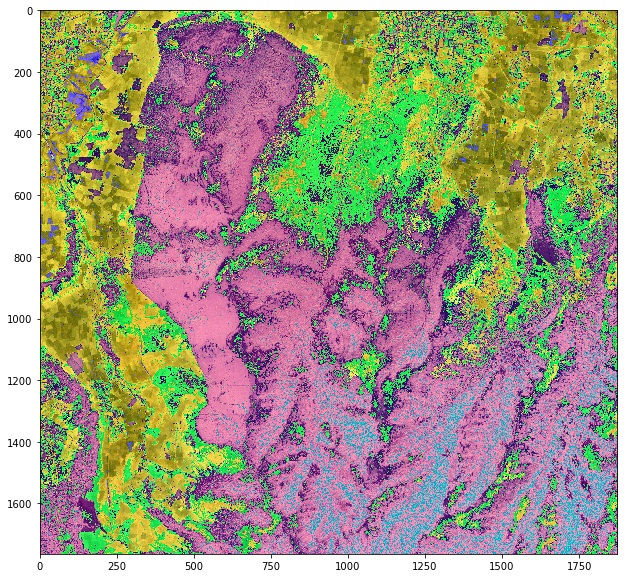

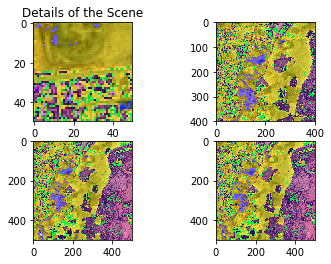

In [16]:
def create_composite16bit(red_band, green_band, blue_band):

    img=np.dstack((red_band,green_band,blue_band))
    
    #p2, p98 = np.percentile(img, (2, 98)) 
    #img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    img_rescale = exposure.rescale_intensity(img, in_range='uint16')

    #return bytescale(img_rescale)   # Konverting to 8bit for output in jupyter
    return img_rescale



image2 = create_composite16bit(IKORed, IKOGreen, IKOBlue)
plt.figure(figsize=(20,10))  
#plt.imshow(bytescale(image))
plt.imshow(image2)

plt.show()

# see http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots
  
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(image2[0:50,0:50,0:3])
ax1.set_title('Details of the Scene')
ax2.imshow(image2[0:400,0:400,0:3])
ax3.imshow(image2[0:500,0:500,0:3])
ax4.imshow(image2[0:500,0:500,0:3])
plt.show()

**Hier noch probieren ob  mit plt.imshow() bytescale genutzt werden kann statt 2 funktionnen zu verwenden.**

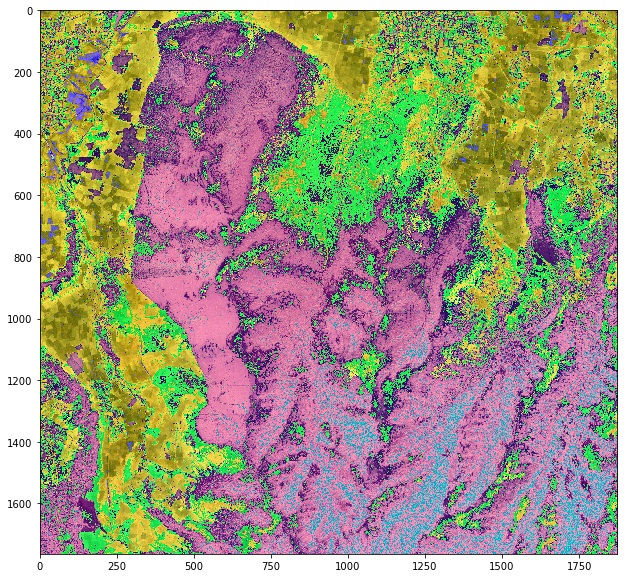

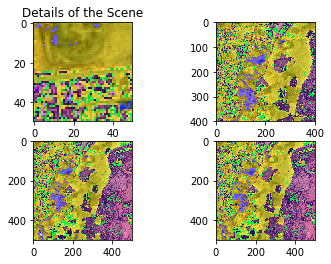

In [28]:
image = create_composite(IKORed, IKOGreen, IKOBlue)
plt.figure(figsize=(20,10))  
#plt.imshow(bytescale(image))
plt.imshow(image)

plt.show()

# see http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots
  
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(image[0:50,0:50,0:3])
ax1.set_title('Details of the Scene')
ax2.imshow(image[0:400,0:400,0:3])
ax3.imshow(image[0:500,0:500,0:3])
ax4.imshow(image[0:500,0:500,0:3])
plt.show()

In [ ]:
print(image.dtype)


Analyse the Correlation between two Channels
---

In [17]:
np.corrcoef(np.ravel(IKORed),np.ravel(IKOGreen))

array([[ 1.        ,  0.98998491],
       [ 0.98998491,  1.        ]])

In [18]:
from scipy import stats

In [19]:
stats.spearmanr(np.ravel(IKORed),np.ravel(IKOGreen))

SpearmanrResult(correlation=0.99000750346076183, pvalue=0.0)

Filtering
---

In [ ]:
from skimage import data,filters,feature
image = data.coins() # or any NumPy array!
#edges = filters.median(image)
plt.imshow(image,cmap='gray')
plt.show()

edges = filters.prewitt(image)
skio.imshow(edges)
skio.show()


edges = filters.sobel(image)
skio.imshow(edges)
skio.show()

edges = feature.canny(image)
skio.imshow(edges)
skio.show()

Annimation of Convolution

Filtering of images
---

In [ ]:
from skimage import data,filters,feature
image = data.coins() # or any NumPy array!
#edges = filters.median(image)
plt.imshow(image,cmap='gray')
plt.show()

edges = filters.prewitt(image)
skio.imshow(edges)
skio.show()


edges = filters.sobel(image)
skio.imshow(edges)
skio.show()

edges = feature.canny(image)
skio.imshow(edges)
skio.show()

(480, 446, 3)


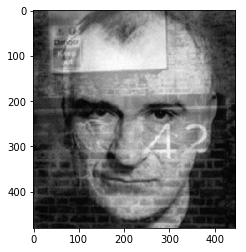

In [20]:
bildDoug=skio.imread('figures/doug.jpg')
print(bildDoug.shape)
plt.imshow(bildDoug)
plt.show()

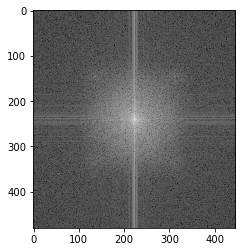

In [21]:
DougFFT    =np.fft.fft2(bildDoug[:,:,0])
DougFFTShift=np.fft.fftshift(DougFFT)
Spectrum   =20*np.log(np.abs(DougFFTShift))

plt.imshow(Spectrum,cmap='gray')
plt.show()

In [22]:
Doug2=np.fft.ifft2(np.fft.ifftshift(DougFFTShift))

#print(Doug2[10:20,10:20])

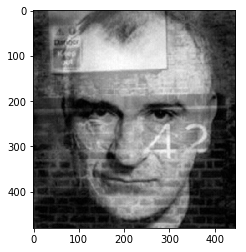

In [23]:
plt.imshow(np.abs(Doug2),cmap='gray')